<IPython.core.display.Javascript object>


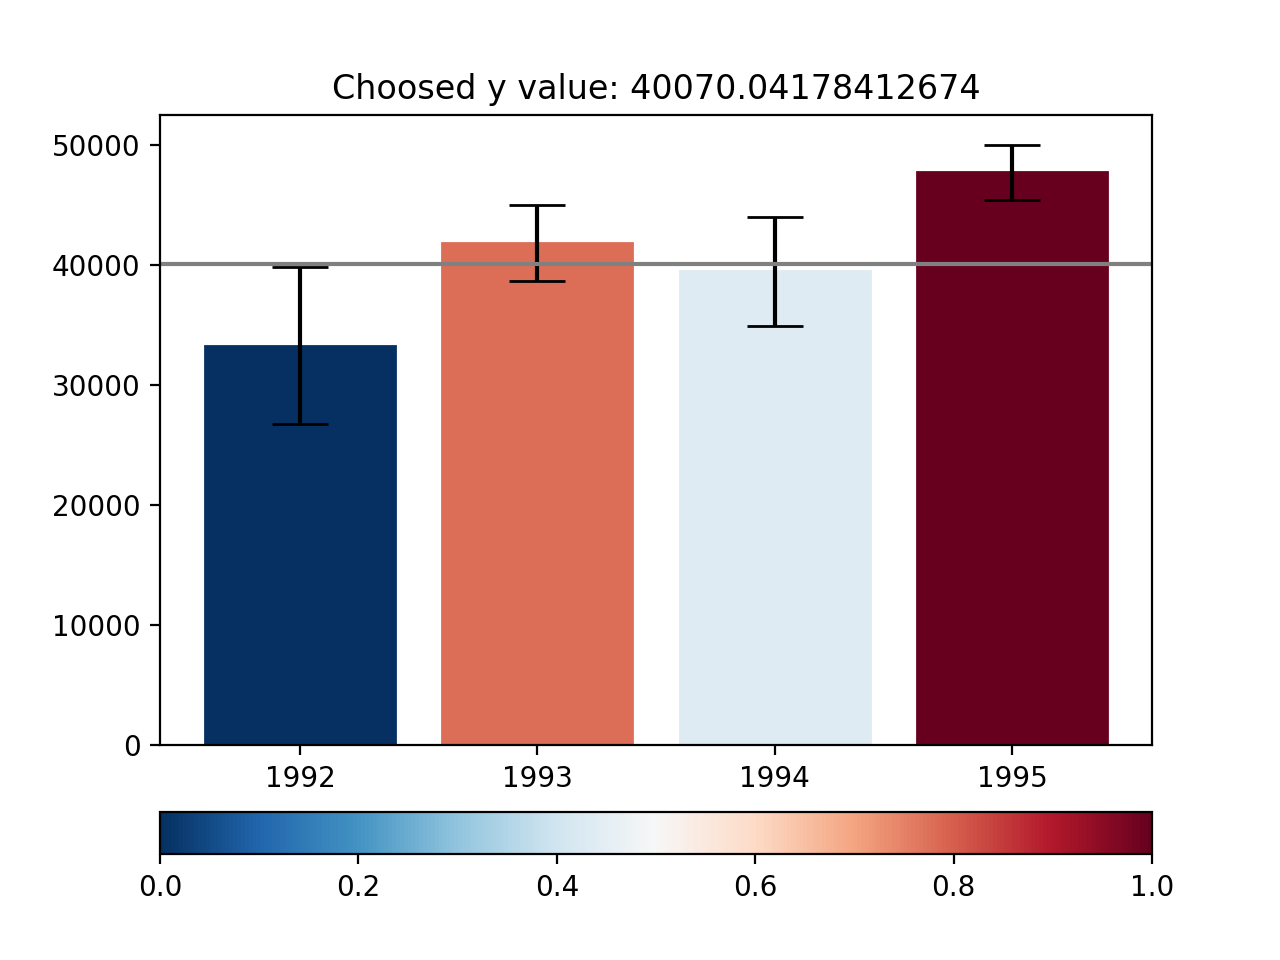

7

In [6]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st

# deal with data

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# set the colorbar as a subplot with bar chart
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios':[15,1]})
norm = mpl.colors.Normalize(vmin=0, vmax=1)
mpl.colorbar.ColorbarBase(ax2, cmap=cm.RdBu_r, norm=norm, orientation='horizontal')
colors=cm.RdBu_r

# plot the basic bar chart
mean = df.mean(axis = 1)
std = df.std(axis = 1)

n = df.shape[1]
yerr = std / np.sqrt(n) * st.t.ppf(1-0.05/2, n-1) # st.t.ppf for the z*-value of different confidence level


bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
ax1.set_xticks(np.arange(1992, 1996, 1))

ax1.set_title('Click to create a new line')


# add interactivity

global ploty
def onclick(event):
    ploty = event.ydata
    
    ax1.cla()
    ax1.axhline(y=ploty, color='grey')
    ax1.set_title('Choosed y value: {}'.format(event.ydata))

    bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
    ax1.set_xticks(np.arange(1992, 1996, 1))

    #calculate the color value (range 0-1) for each year

    inrange = pd.DataFrame([yerr + mean, mean - yerr, mean, yerr*2], index = ['Max', 'Min', 'Mean', 'yerr']).T

    inrange['Diff'] = inrange['Max'] - ploty
    inrange['Setcolor'] = inrange['Diff']/inrange['yerr']

    # set the color for each year
    bar_color = [colors(x) for x in inrange['Setcolor']]

    for n in range(4):
        bars[n].set_color(bar_color[n])
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
fig.canvas.mpl_connect('button_press_event', onclick) # fig is the current figure, same to plt.gcf()
